In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error 

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [43]:
df = pd.read_csv('./data/sea_turtle_population_data.csv',parse_dates=['Date'],index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1984-10-01 to 2020-07-01
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   sea_turtle_count  144 non-null    float64
dtypes: float64(1)
memory usage: 2.2 KB


In [44]:
n_steps_in, n_steps_out = 12,8
n_features = 1

In [45]:
f_columns = ['sea_turtle_count']

scaler = MinMaxScaler(feature_range=(0,1))

df.loc[:, f_columns] = scaler.fit_transform(df[f_columns].to_numpy())

df = df.tail(n_steps_in)

df

,sea_turtle_count
Date,
2017-10-01,0.590909
2018-01-01,0.545455
2018-04-01,0.590909
2018-07-01,0.681818
2018-10-01,0.727273
2019-01-01,0.818182
2019-04-01,1.000000
2019-07-01,0.954545
2019-10-01,0.772727


In [46]:
dataset=df.values
dataset

array([[0.59090909],
       [0.54545455],
       [0.59090909],
       [0.68181818],
       [0.72727273],
       [0.81818182],
       [1.        ],
       [0.95454545],
       [0.77272727],
       [0.68181818],
       [0.54545455],
       [0.63636364]])

In [47]:
dataset.shape

(12, 1)

In [48]:
model=keras.models.load_model('SeaTurtleCountPredictionModel')

In [49]:
# demonstrate prediction
x_input = dataset[:n_steps_in]
x_input = x_input.reshape((1, n_steps_in, n_features))
yhat =np.array( model.predict(x_input))
yhat

array([[[0.3854171 ],
        [0.70452785],
        [0.742073  ],
        [0.6571024 ],
        [0.5889607 ],
        [0.5978733 ],
        [0.7248317 ],
        [0.97095037]]], dtype=float32)

In [50]:
yhat=scaler.inverse_transform(yhat[0])
yhat.shape

(8, 1)

In [51]:
yhat

array([[16.479176],
       [23.499613],
       [24.325605],
       [22.456251],
       [20.957136],
       [21.153212],
       [23.946297],
       [29.360909]], dtype=float32)

In [52]:
start_date=df.iloc[-1].name
start_date

Timestamp('2020-07-01 00:00:00')

In [53]:
d=start_date+pd.tseries.offsets.DateOffset(months=1)
months_array=[ start_date+pd.tseries.offsets.DateOffset(months=i) for i in range(1,yhat.shape[0]+1)]
months_array

[Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00'),
 Timestamp('2020-11-01 00:00:00'),
 Timestamp('2020-12-01 00:00:00'),
 Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00')]

In [54]:
df1=pd.DataFrame(yhat)
df1['Date']=months_array
df1=df1.set_index('Date')
df1.columns=f_columns
df1

,sea_turtle_count
Date,
2020-08-01,16.479176
2020-09-01,23.499613
2020-10-01,24.325605
2020-11-01,22.456251
2020-12-01,20.957136
2021-01-01,21.153212
2021-02-01,23.946297
2021-03-01,29.360909


In [55]:
df3=df.append(df1)
df3

,sea_turtle_count
Date,
2017-10-01,0.590909
2018-01-01,0.545455
2018-04-01,0.590909
2018-07-01,0.681818
2018-10-01,0.727273
2019-01-01,0.818182
2019-04-01,1.000000
2019-07-01,0.954545
2019-10-01,0.772727


In [56]:
predicted=yhat[:,0]
predicted

array([16.479176, 23.499613, 24.325605, 22.456251, 20.957136, 21.153212,
       23.946297, 29.360909], dtype=float32)

In [57]:
dataset

array([[0.59090909],
       [0.54545455],
       [0.59090909],
       [0.68181818],
       [0.72727273],
       [0.81818182],
       [1.        ],
       [0.95454545],
       [0.77272727],
       [0.68181818],
       [0.54545455],
       [0.63636364]])

In [58]:
true=scaler.inverse_transform(dataset)
true

array([[21.],
       [20.],
       [21.],
       [23.],
       [24.],
       [26.],
       [30.],
       [29.],
       [25.],
       [23.],
       [20.],
       [22.]])

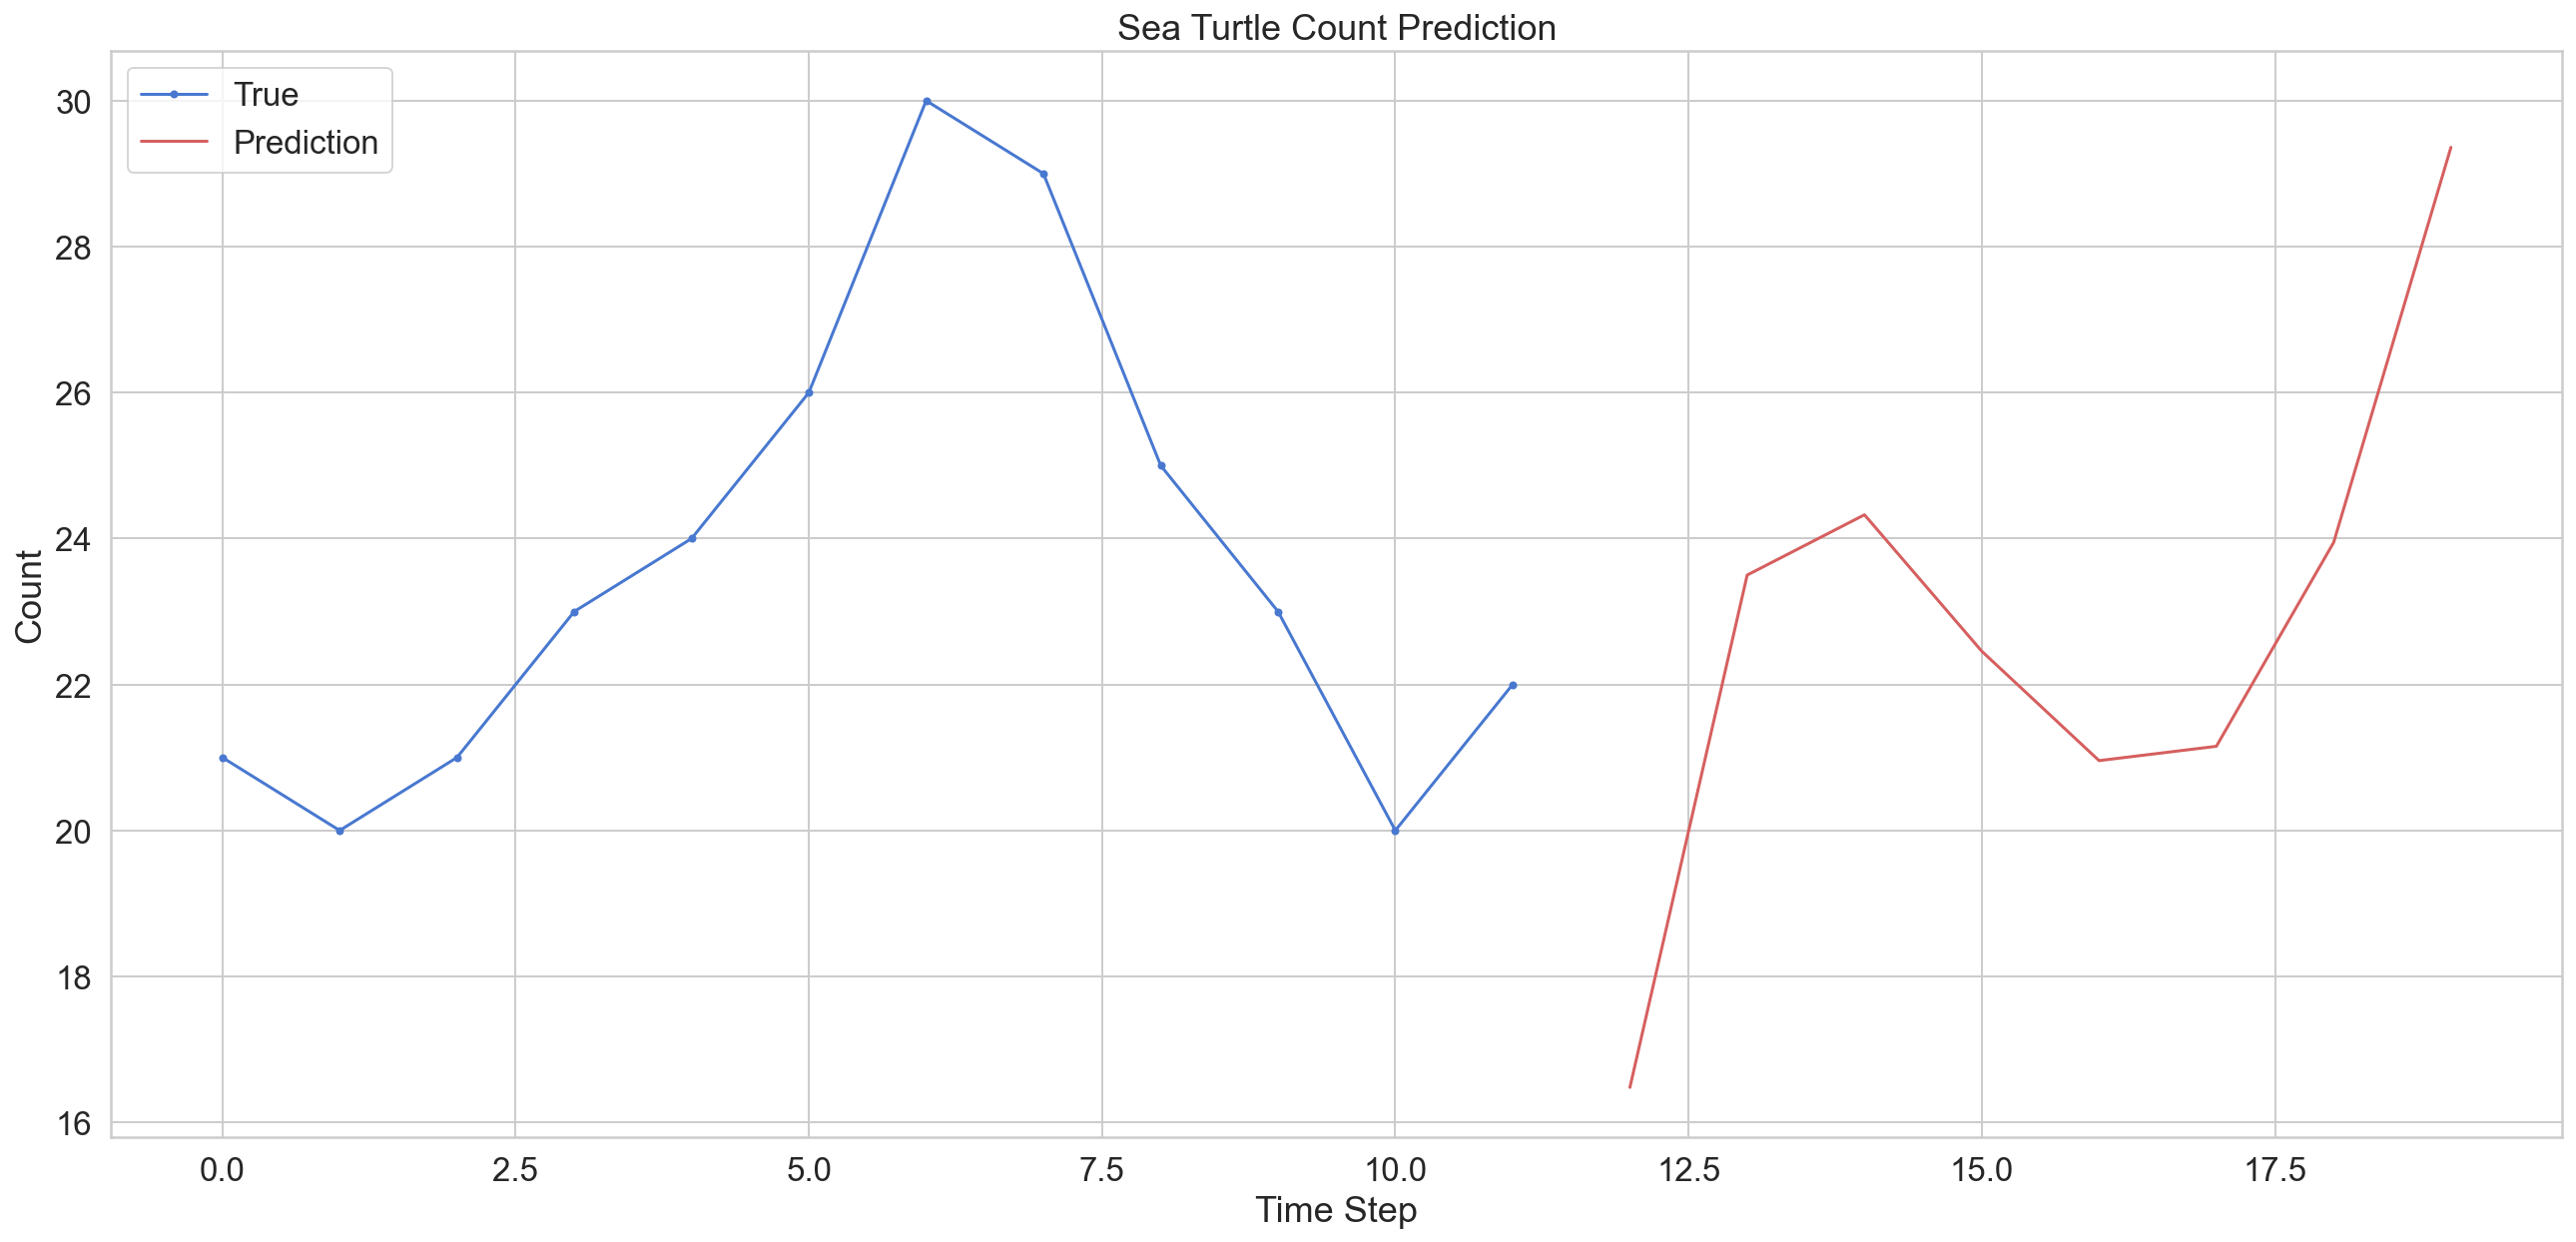

In [59]:
plt.plot(np.arange(0, len(true)), true.flatten(), marker='.', label="True")
plt.plot(np.arange(len(true), len(true)+len(predicted)), predicted.flatten(), 'r', label="Prediction")
plt.ylabel('Count')
plt.xlabel('Time Step')
plt.title('Sea Turtle Count Prediction')
plt.legend()
plt.show();